# Introdução

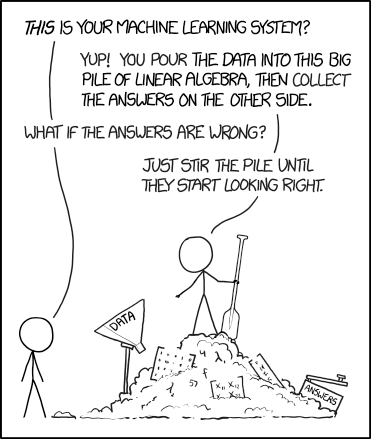

Retirado de https://xkcd.com/1838/

* **Estatística**: "Disciplina que trata da coleta, organização, análise, interpretação e apresentação de dados". [Fonte: Wikipedia]

* **Aprendizado estatístico/*Machine Learning***: Conjunto de ferramentas e modelos para entender dados, com especial atenção a aspectos de eficiência computacional. [Fonte: Wikipedia + vozes da minha cabeça]

* Métodos tradicionais de Estatística não são mais capazes de lidar com volumes de dados disponíveis atualmente

* Dados complexos: um bom entendimento sobre a aplicação não é somente importante mas crucial, em particular, para a elaboração de novas metodologias

* Em particular, metodologias e algoritmos podem ser fortemente dependentes da aplicação

Mudança de paradigma

* Estatística do Séc. XX:
   - Resultados assintóticos
   - $n \gg p$, onde $n$ é o número de observações e $p$ é o número de covariáveis

- Aplicações modernas:
   * $p \approx n$ ou $p \gg n$ -- ou seja, potencialmente mais coisas para se estimar do que se observa!
   * Resultados assintóticos não se aplicam mais

Duas culturas:
- Modelagem dos dados: criação e validação de um modelo para os dados observados. Foco em inferência
- Modelagem algorítmica: criação de bons algoritmos para prever novas instâncias observadas. Muitas vezes não lança mão de modelo probabilístico algum para os dados

$\Rightarrow$ "Nem melhor nem pior, apenas diferentes!"

Duas grandes áreas:

- Aprendizado supervisionado: modelos para aprender uma relação entre uma entrada e uma saída com base em um conjunto de exemplos ◄
- Aprendizado não-supervisionado: algoritmos que aprendem padrões e estruturas subjacentes em dados não-anotados

Dois principais tipos de problemas:

- Regressão: variável de saída é quantitativa
- Classificação: variável de saída é categórica ◄

## Classificação supervisionada sob a ótica da modelagem dos dados

- $\mathbf{X}$ vetor aleatório em $\mathbb{R}^p$ - *preditores* ou *atributos* (*features*)
- $\mathcal{C}$ conjunto finito - *rótulos*
- $Y$ variável aleatória em $\mathcal{C}$ finito

- Distribuição de probabilidade conjunta para $(\mathbf{X}, Y)$
- Observações $(\mathbf{X}_1, Y_1), \dots, (\mathbf{X}_n, Y_n), \dots \sim (\mathbf{X}, Y)$ iid
- Problema de **predição**: A partir de observações $(\mathbf{x}_i, y_i)_{i = 1, \dots, n}$ encontrar $g: \mathbb{R}^p \to \mathcal{C}$ (dito o *classificador*) tal que $$``g(\mathbf{x}_{n + 1}) \approx y_{n + 1}, \dots, g(\mathbf{x}_{n + m}) \approx y_{n + m}"$$

- Como formular tal pergunta sem aspas?
- Como encontrar tal $g$?

- *Risco esperado* associado à $g$: $$R(g) = \mathbb{E}[\underbrace{(Y - g(\mathbf{X}))^2}_{L(g; (\mathbf{X}, Y))}]$$
- "Basta" encontrar $g$ que minimiza tal quantidade! :-)

Mas nem tudo são flores...
- Tal procedimento é impossível... requer conhecimento completo do modelo probabilístico que relaciona $\mathbf{X}$ com $Y$!
- Além disso, a *perda quadrática* $L(g; (\mathbf{X}, Y)) = (Y - g(\mathbf{X}))^2$ não faz sentido no problema de classificação!

$$``g(\mathbf{x}_{i}) \approx y_{i}"$$

$$g(\mathbf{x}_{i}) = y_{i} \implies \text{:-)} \\ g(\mathbf{x}_{i}) \neq y_{i} \implies \text{:-(}$$

Uma função perda razoável parece ser $$L(g; (\mathbf{X}, Y)) = \mathbb{I}(Y \neq g(\mathbf{X})) = \begin{cases} 0, &\text{ se } Y = g(\mathbf{X}) \\ 1, &\text{ se } Y \neq g(\mathbf{X}) \end{cases}$$

Sua respectiva função risco é dada por $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$

Qual classificador $g$ minimiza tal probabilidade?

### O classificador de Bayes

*Teorema*: A função $g: \mathbb{R}^p \to \mathcal{C}$ que minimiza o risco $$R(g) = \mathbb{E}[\mathbb{I}(Y \neq g(\mathbf{X}))] = \mathbb{P}(Y \neq g(\mathbf{X}))$$ é o *classificador de Bayes*, dado por $$g(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$$


- Classificamos $\mathbf{x}$ com a classe que possui a maior probabilidade *a posteriori*
- Porém, $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ é em geral desconhecida

- Estimar $\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x})$ para cada classe $d \in \mathcal{C}$
- Considerar o classificador $$\widetilde{g}(\mathbf{x}) = \mathop{\mathrm{argmax}}_{d \in \mathcal{C}} \widehat{\mathbb{P}}(Y = d | \mathbf{X} = \mathbf{x})$$

### Classificador de Bayes ingênuo

#### Formulação matemática

- $\mathbf{X} \in \mathbb{R}^p$ vetor de atributos - vetor aleatório contínuo ou discreto
- Se $\mathbf{X}$ é contínuo com densidade $q(\mathbf{x})$, temos que: $$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{x} | Y = c)\mathbb{P}(Y = c)} ~~~~ \mathrm{[\textit{Bayes...}]}$$
- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes
- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{x} | Y = d)$
- $\mathrm{[\textit{...ingênuo}]}$ Para toda classe $d \in \mathcal{C}$, fatoramos $$q(\mathbf{x} | Y = d) = q(x_1, \dots, x_p | Y = d) = \prod_{j = 1}^{p} q(x_j | Y = d)$$
- *Condicionalmente à classe* $Y$, as componentes de $\mathbf{X}$ são independentes


### Classificador de Bayes ingênuo gaussiano

- $p$ atributos
- $n$ observações de cada


- Dados observados: $X$ matriz $n \times p$
- Cada linha: uma realização do vetor aleatório **contínuo** $\mathbf{X} \in \mathbb{R}^{p}$

- Variável resposta $Y \in \mathcal{C}$ - $n$ observações

- Como $\mathbf{X}$ é contínuo, temos que:


$$\mathbb{P}(Y = d | \mathbf{X} = \mathbf{x}) = \frac{q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)}{\sum_{c \in \mathcal{C}} q(\mathbf{X} = \mathbf{x} | Y = c)\mathbb{P}(Y = c)} \propto q(\mathbf{X} = \mathbf{x} | Y = d)\mathbb{P}(Y = d)$$

- $\mathbb{P}(Y = d)$ estimado através da proporção amostral entre as classes

- Assumir algum modelo probabilístico em $\mathbf{X}$ para estimar $q(\mathbf{X} = \mathbf{x} | Y = d)$, para $d \in \mathcal{C}$

- Hipótese ingênua: *condicionado à classe, as componentes de $\mathbf{X}$ são independentes*

- Matematicamente: *para toda classe $d \in \mathcal{C}$, fatoramos* $$q(\mathbf{X} = \mathbf{x} | Y = d) = q(X_1 = x_1, \dots, X_p = x_p | Y = d) = \prod_{j = 1}^{p} q(X_j = x_j | Y = d)$$


- $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$

# O projeto

O objetivo do projeto é trabalhar com a base de dados MNIST ("*Modified National Institute of Standards and Technology*"). Tal base consiste de 70.000 imagens de tamanho 28 x 28, em tons de cinza, contendo dígitos manuscritos, e o principal objetivo com ela é identificar qual é o dígito em questão. Algoritmos extremamente sofisticados (e pesadíssimos!) chegam a atingir uma taxa de erro de 0,17%, mas aqui vamos trabalhar com um algoritmo bem mais simples, o classificador de Bayes ingênuo Gaussiano, introduzido acima. Para tal, vamos usar o pacote `scikit-learn` (https://scikit-learn.org/stable/), que implementa diversos algoritmos de aprendizado de máquina de forma muito eficiente e de fácil uso. Abaixo seguem alguns códigos para melhor guiá-los, e no meio há instruções para o que deve ser feito no projeto.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## A base de dados

Primeiramente, vamos carregar e fazer uma análise preliminar na base de dados.

In [ ]:
# Baixando a base de dados

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=True)

In [ ]:
# Vendo o cabeçalho referente à X, bem como seu tamanho

print(X.shape)
X.head()

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Vendo o cabeçalho referente à y, bem como seu tamanho

print(y.shape)
y.head()

(70000,)


0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

Como podemos ver acima, `X` é um *dataframe* de 70.000 linhas e 784 colunas, e `y` é um *array* de tamanho 70.000, contendo o número referente a cada linha de `X`. Portanto, cada linha de `X` representa uma imagem de um dígito manuscrito. Vejamos alguns exemplos:

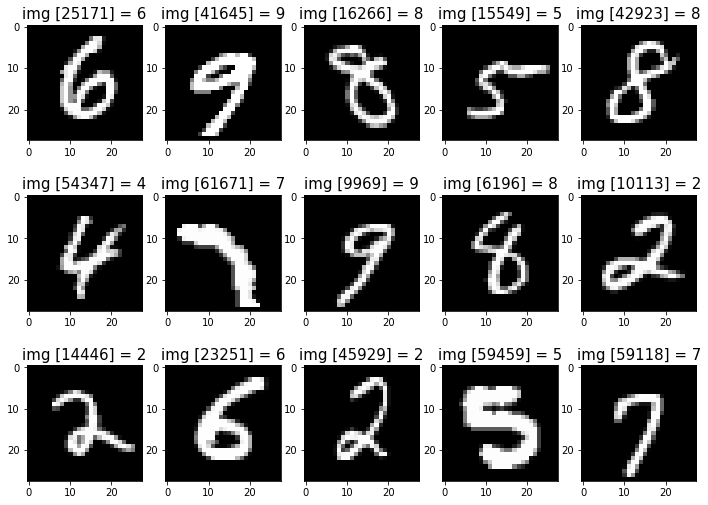

In [ ]:
# FONTE: https://www.kaggle.com/code/soham1024/basic-neural-network-from-scratch-in-python

def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(12, 12))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0].reshape(28, 28)        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

random_images = []
for i in range(0, 15):
    r = np.random.randint(1, 70000)
    random_images.append((X.values[r], 'img [' + str(r) + '] = ' + str(y[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Acima, nós vimos como são algumas das linhas de `X` pensadas como uma imagem de tamanho 28 x 28. Agora, vamos estudar a sua estrutura como um vetor de tamanho 784.

Dígito: 0


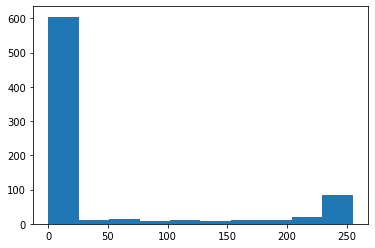

In [ ]:
r = np.random.randint(1, 70000)
plt.hist(X.values[r])
print('Dígito:', y[r])
plt.show()

Portanto, do ponto de vista estatístico, cada linha do *dataframe* `X` consiste de 784 observações de variáveis aleatórias que tomam seus valores entre 0 e 255 e concentram-se principalmente em torno de tais valores. Essa é exatamente a estrutura de uma imagem em tons de cinza: o valor igual a 0 representa um *pixel* totalmente preto e um valor igual a 255 representa um *pixel* totalmente branco. Recomendo rodar diversas vezes o bloco acima, para verificar como varia o histograma dos tons de cinza. Nosso objetivo será tentar identificar qual dígito está sendo representado por determinado vetor de tamanho 784 (cujas componentes chamaremos de *atributos*), utilizando o classificador de Bayes ingênuo gaussiano que discutimos acima.

Para melhorar a magnitude de nossos dados, iremos fazer uma espécie de normalização, dividindo todos os valores de `X` por 255, para que tenhamos sempre valores entre 0 e 1.

In [ ]:
# ATENÇÃO! Se você rodar essa célula mais de uma vez, vai estar "comprimindo" ainda mais os valores de X! Recomendo não fazer isso para evitar erros numéricos.

X = X/255

**QUESTÃO 1:** O classificador de Bayes ingênuo Gaussiano tem duas hipóteses: condicionado na classe, os atributos são (1) independentes e (2) descritos por distribuições normais (com parâmetros desconhecidos). "Traduza" o que isso significa na linguagem do problema em questão (quais são nossos atributos? nossas classes? etc...), e discorra sobre a razoabilidade de tais hipóteses em nosso cenário.

*BÔNUS*: Apresente uma análise exploratória para justificar as suas conclusões.

De início, vale ressaltar que a independência entre as variáveis aleatórias — pixels das imagens —, quando condicionadas à classe, não é correta de se afirmar, uma vez que a cor dos pixels (valor dos atributos) não pode ser desvinculada dos pixels adjacentes, por exemplo. Afinal, as imagens possuem um formato coerente que se relaciona com as características visuais de um dígito — particularidades de sua classe —, representado pela imagem. Por outro lado, dado que o foco da modelagem encontra-se na previsão das classes de novas instâncias, por meio da Modelagem algoritmíca, é aceitável modelar o problema negligenciando esse fato, de forma que não seria razoável caso fosse uma Modelagem de dados cujo cerne é a inferência estatística. Nesse cenário, torna-se viável utilizar o Classificador de Bayes ingênuo.

Além disso, busca-se modelar as 784 variáveis aleatórias — atributos ou pixels da imagem — por distribuições normais (com parâmetros desconhecidos) com o intuito de estimar $q(X = x|Y = d)$ e poder utilizar o Classificador de Bayes ingênuo, adicionando, assim, o adjetivo Gaussiano. No entanto, essa modelagem apresenta algumas inconsistências, tais como as exibidas nos histogramas abaixo. Nesse exemplo, o pixel 300 das classes do número 2 e 4, respectivamente, possuem distribuição bem destoante da normal.

Diante disso, a razoabilidade dessa modelagem encontra-se no resultado a ser obtido do ponto de vista das métricas do problema — trata-se apenas da determinação das classes de novas instâncias — e da eficiência computacional, que seria afetada negativamente em decorrência da introdução de complexidade na modelagem.

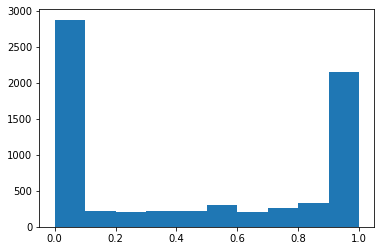

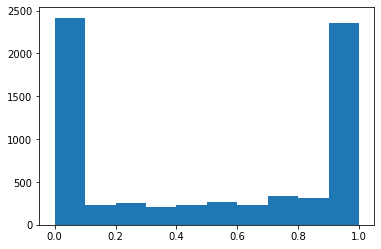

In [ ]:
plt.hist(X['pixel300'][y == '2'])
plt.show()

plt.hist(X['pixel300'][y == '4'])
plt.show()

## Classificando a base

Uma prática em aprendizagem de máquina é dividir nossa base de dados em duas partes: um *conjunto de treinamento* e um *conjunto de teste*. O primeiro será usado para estimarmos os parâmetros que o classificador precisará, e o segundo será usado para medir a sua performance. O `scikit-learn` tem ferramentas que fazem essa separação de modo automático. Abaixo, deixamos 60.000 observações para treinamento e 10.000 para teste. Para garantir igual representatividade das classes em ambos os conjuntos fazemos uma *amostragem estratificada*, através do parâmetro `stratify = y`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, shuffle = True, stratify = y)

**QUESTÃO 2:** A classe que vamos usar para fazer o nosso procedimento é a `GaussianNB`, localizada dentro do módulo `naive_bayes`. A documentação do `scikit-learn` é bastante informativa, e particularmente me ajuda bastante a entender os algoritmos lá implementados. Portanto, leiam a documentação referente ao `GaussianNB` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html), e a página direcionada através do *link* "User Guide", onde encontra-se a formulação matemática por trás do método em questão. Após essa leitura, façam uma comparação do que lá é dito com o que foi apresentado acima sobre o método de classificação proposto, elencando pontos onde há semelhanças e divergências. Em particular, descreva o que os métodos `fit`, `predict` e `predict_proba` fazem.

O `GaussianNB` faz parte de um conjunto de algoritmos de aprendizado de máquina supervisionado, nos quais é aplicado o Teorema de Bayes em seus classificadores, considerando a "inocente" independência entre os atributos de uma dada classe. A partir disso, o `GaussianNB` difere dos demais algoritmos do módulo `naive_bayes` devido ao método utilizado para o cálculo de $P(x_i|y)$.

Em relação ao método de classificação proposto, o `GaussianNB` possui as seguintes semelhanças:

- Considera independente os atributos, quando condicionados à classe

- Retira o fator de normalização do cálculo

- Classifica x com a classe que possui a maior probabilidade a posteriori

- Assume que os atributos possuem distribuição normal com parâmetros desconhecidos

Além disso, o método descrito no User-Guide estima os parâmetros $\mu_{y}$ e $\sigma_{y}$ utilizando o método da máxima verossimilhança.

Em suma, o método de classificação proposto acima e aquele utilizado no `GaussianNB` não possuem divergências tão notórias.

Acerca dos métodos do `GaussianNB`, o método `fit` popula o modelo com os dados dos atributos associados às suas classes, estima os parâmetros necessários — média e variância, por exemplo — e cria/executa o classificador. Além disso, o método `predict` trata do processo de classificação de uma nova entrada e o `predict_proba` atua como um estimador, fornecendo as probabilidades de uma nova entrada ser de cada classe.


**QUESTÃO 3:** Agora é a sua vez de trabalhar sobre a base de dados que apresentamos! Use o `GaussianNB` para treinar um modelo de Bayes ingênuo gaussiano nos conjuntos `X_train` e `y_train`, e prever os resultados no conjunto `X_test`. Agora, com um exemplo concreto em mãos, revisite o que os métodos  `predict` e `predict_proba` fazem. Uma dica é olhar os exemplos na documentação do `scikit-learn`.

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

print(f'Score: {clf.score(X_train, y_train)}')

print("Número de classificações incorretas em um total de %d: %d" % (X_test.shape[0], (y_test != y_test_pred).sum()))

Score: 0.55935
Número de classificações incorretas em um total de 10000: 4394


**QUESTÃO 4:** Nós temos um conjunto de dados relativamente grande, com 60.000 observações. Para ajustar um classificador de Bayes ingênuo gaussiano, quantos parâmetros nós precisamos estimar? Compare esse número com o tamanho do conjunto de treinamento, e diga o que você pode esperar da qualidade de tais estimativas pontuais.

Segundo o Classificador de Bayes ingênuo gaussiano, os atributos condicionados na classe tem distribuição normal, de modo que $X_j | Y = d \sim \text{N}(\mu_{dj}, \sigma_{dj}^2)$. Portanto, para cada parâmetro $\mu_{dj}$ e $\sigma_{dj}^2$, o valor estimado dependerá da classe — representada pelo índice d — e do atributo do vetor aleatório X — representado pelo índice j.

Isso posto, cada uma das 60.000 observações é um vetor aleatório de tamanho 784 e, para cada componente desse vetor, serão estimadas uma média e uma variância. Além disso, há 10 classes e, para cada classe, haverá 784 variáveis aleatórias que serão representativas da classe. Dessa forma, no total temos que:

$\text{Nº de parametros estimados} = \text{Nº de classes} \times \text{Nº de atributos} \times \text{Nº de parametros}$

Como há 784 atributos, 10 classes e 2 parâmetros (média e variância), serão estimados $10 \times 784 \times 2 = 15680$ parâmetros para um total de 60000 observações de vetores de tamanho 784.

A partir disso, observa-se que o número de observações ainda é bastante alto quando comparado com a quantidade de parâmetros a serem estimados, porém essa quantidade está se aproximando do número de observações, o que torna menos eficaz o uso de recursos matemáticos como o Teorema central do limite e a Lei dos grandes números. Nesse cenário, o problema se distancia do paradigma da estatística clássica do século XX e chega perto da estatística moderna, de forma que pode prejudicar a qualidade das estimativas.

**QUESTÃO 5:** Bom, agora nós temos um classificador e temos como prever o resultado da classificação no nosso conjunto de teste. Mas como podemos *medir* o desempenho de nosso classificador? Estude sobre a *matriz de confusão* e sobre a *acurácia* de um classificador, e disserte sobre essas duas quantidades. Relacione a quantidade retornada pelo método `score` com a acurácia que você acabou de estudar.

Recomendação:
* https://en.wikipedia.org/wiki/Confusion_matrix [A matriz de confusão aqui será referente a um problema de classificação *binário*, enquanto que estamos tratando de um problema de classificação *multiclasse*. Tome cuidado com essa diferença]
* https://en.wikipedia.org/wiki/Accuracy_and_precision

*BÔNUS:* Porque acima nós falamos somente sobre aferir a qualidade do classificador no conjunto de teste e não no de treinamento? Discuta sobre esse ponto.

### Matriz de confusão

A matriz de confusão é um tipo especial de tabela de contingência que se trata de uma matriz na qual é exibida a distribuição da frequência de variáveis. Especificamente, a matriz de confusão é utilizada para a visualização da performance de um algoritmo. Em sua estrutura, cada linha da matriz representa a verdadeira classe da instância enquanto cada coluna representa a classe estimada, podendo haver variações acerca dessa organização.

Nesse contexto, a matriz de confusão é comumente utilizada em problemas de classificação binária, devido a sua qualidade de apresentação, cuja distribuíção dos resultados é feita em 4 diferentes grupos: verdadeiro positivo, falso positivo, verdadeiro negativo e falso negativo. Por outro lado, a matriz de confusão não se restringe a problemas de classificação binária, de modo que pode ser utilizada para classificadores multiclasse, como o cenário do projeto em questão.

### Conceito de Acurácia

Geralmente associada à matriz de confusão, há o conceito de acurácia cujo significado confunde-se com a precisão que também é utilizada para mensurar erros em diversos contextos. Dessa forma, a precisão, do ponto de vista estatístico, trata-se da dispersão/variabilidade de resultados, enquanto que a acurácia é definida pela proximidade ou diferença entre os resultados obtidos e seus verdadeiros valores. Nesse cenário, surgem os termos viés que se refere à falta de acurácia e a variabilidade que se refere à quantidade de imprecisão.

Na classificação binária, a acurácia é uma proporção de previsões corretas em relação ao total de casos avaliados, cuja fórmula é dada por:

$ \text{Acurácia binária} = \frac{TP + TN}{TP + TN + FP + FN}$

Onde TP = Verdadeiro positivo; FP = Falso positivo; TN = Verdadeiro negativo; FN = Falso negativo

Em classificação multiclasse, a acurácia é simplesmente a fração de classificações corretas, cujo cálculo é dado por:

$ \text{Acurácia Multiclasse} = \frac{\text{Classificações corretas}}{\text{Total de classificações}}$

### Relação entre `score`, acurácia e a matriz de confusão

Em vista disso, há o método `score` que é responsável pelo retorno da acurácia resultante de uma classificação, servindo como uma medida de qualidade da previsão. Nesse caso, esse metódo diz respeito à acurácia do classificador quando utilizado no conjunto de teste, que é fornecido como parâmetro. No projeto em questão, o cálculo pode ser feito num cenário de classificação multiclasse por meio da divisão entre a soma da diagonal principal da matriz de confusão pelo número total de classificações.






**QUESTÃO 6:** Use o código dado abaixo para exibir a matriz de confusão, bem como uma representação gráfica mais amigável dela. Analise os erros cometidos pelo classificador e tente justificá-los, com base nas hipóteses do classificador e da natureza da base de dados. Calcule também a acurácia do classificador estimado. À luz dessas duas informações, extraia alguma conclusão sobre o classificador ser "bom" ou "ruim", em seu ponto de vista. Note que sua ponderação deve levar em consideração também o custo computacional de nosso classificador! Use como um "pior classificador possível" aquele que atribui uma observação a qualquer um dos dígitos de 0 até 9, aleatoriamente.

[[ 887    1    2    1    2    1   30    0   41   21]
 [   0 1063    4    4    0    0   16    0   29    9]
 [ 103   21  266   68    5    4  269    1  242   20]
 [  62   42   12  382    4    1   43   10  354  110]
 [  38    3    8    6  158    5   87    2  197  471]
 [ 105   23    3   15    6   47   40    3  574   86]
 [   8   12    4    0    3    4  933    0   17    1]
 [   4    8    1    7    9    1    3  306   34  669]
 [  12  116    2    9    2    3   20    1  630  180]
 [   9    5    5    3    7    0    2   11   18  934]]


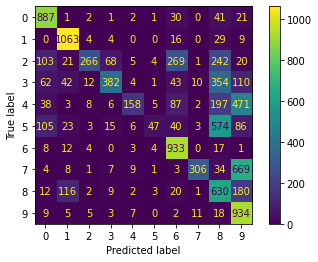

Acurácia: 0.5606


In [ ]:
# A variável y_test_pred abaixo deverá ser a previsão do seu classificador no conjunto de teste, ou seja, em X_test.

def calcularAcuracia(matrizDeConfusao):
  classificacoesCorretas = 0
  totalDeClassificacoes = 0

  for i in range(len(matrizDeConfusao)):
    for j in range(len(matrizDeConfusao)):
      if i == j:
        classificacoesCorretas += matrizDeConfusao[i][j]
      totalDeClassificacoes += matrizDeConfusao[i][j]

  return classificacoesCorretas / totalDeClassificacoes

labels = y.cat.categories

cm = confusion_matrix(y_test, y_test_pred, labels=labels)
print(cm)

disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

print(f'Acurácia: {calcularAcuracia(cm)}')

### Conclusão sobre o classificador

Antes de atribuir o rótulo de "bom" ou "ruim" ao classificador, deve-se analisar os seguintes fatores: custo computacional, complexidade da modelagem e acurácia obtida. 

Isso posto, esse classificador possui um modelo bastante simples, que realiza diversas adaptações e simplificações por meio de diversas hipóteses como a independência entre os atributos. Além disso, considera-se que esses atributos possuem distribuição normal com parâmetros desconhecidos, de modo que reduz a precisão do classificador em associação com a hipótese de independência.

Nesse contexto, também há o fato da análise ter sido feita com base nos pixels individualmente e não na imagem como um todo, agravando a imprecisão do classificador, uma vez que os pixels não possuem significado isoladamente. De forma alternativa, poderiam ter sido utilizados classificadores mais precisos, cuja análise estaria centrada em aspectos "mais humanos" com a observação da forma visual criada pelos pixels em conjunto. No entanto, essa implementação acarretaria num maior custo computacional. 

Em contrapartida, o classificador do projeto apresenta custo computacional baixo — executa em poucos segundos — em detrimento da acurácia do classificador. Como resultado, esse classificador possui a acurácia de 56,77%, o que é bastante baixo em comparação com os melhores classificadores existentes — cerca de 99,83% de acurácia. Entretanto, possui uma acurácia relativamente maior do que o pior classificador aceitável — 10% de acurácia — que se trata da escolha aleatória de um número entre 0 e 9.

A partir disso, considero esse classificador bom em razão de todo custo-benefício no que se refere ao balanço entre custo computacional e a acurácia obtida. Ademais, sua acurácia de 56,77% está mais próxima do melhor classificador de 99,83% e mais distante do pior classificador de 10%, como mostrado abaixo:

$99,83 - 56,77 < 56,77 - 10 \implies 43.06 < 46.77 $ 

### Principais erros apontados pela matriz de confusão

#### Entre 100 e 200 ocorrências

- 8: Confundido com 1 e 9

#### Entre 200 e 300 ocorrências

- 2: Confundido com 6 e 8
- 4: Confundido com 8

#### Acima de 300 ocorrências

- 3: Confundido com 8
- 4: Confundido com 9
- 5: Confundido com 8
- 7: Confundido com 9

Ao observar os erros mais frequentes, percebe-se que os números confundidos possuem suas áreas marcadas de branco bem próximas, de modo que o classificador estima esses números como pertencentes à mesma classe. Conforme descrito na seção acima, esses erros ocorrem em razão da hipótese de independência entre os pixels e devido à natureza da análise feita pelo classificador, cujo algoritmo avalia apenas os pixels separamente, negligenciando o aspecto visual do símbolo formado pelo conjunto desses pixels. 

**QUESTÃO 7:** Finalmente, após ter realizado todos esses experimentos, descreva quais hipóteses poderiam ser aprimoradas em nosso classificador, para que ele seja mais condizente com a base de dados e, portanto, possivelmente apresente um resultado melhor.

Como foi dito anteriormente, as duas hipóteses que reduzem a precisão do classificador são a independência entre os pixels e a distribuição normal desses atributos. Ambas hipóteses foram adotadas com o intuito de viabilizar computacionalmente em termos de desempenho e também devido à falta de rigor com a manipulação dos dados, visto que trata-se de um problema de classificação. No entanto, a acurácia do classificador foi bastante prejudicada por essas adapções feitas em cima do Classificador de Bayes.

Diante disso, uma possível alternativa de modelagem é destacada no [Contextual image classification](https://en.wikipedia.org/wiki/Contextual_image_classification), que abrange a área da visão computacional. Essa abordagem de classificação vai de encontro à hipótese de independência assumida no projeto, uma vez que a Contextual image classification foca na relação existente entre os pixels. Nesse contexto, os métodos que fazem uso dessa informação contextual são menos sensíveis às variações e ruídos das imagens, pois consideram a continuidade dos segmentos, evitando a classificação errada de regiões da imagem.

Por outro lado, há a possibilidade de utilizar o [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) ou o [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis) que utilizam o classificador de Bayes, não assumem a independência entre os pixels e consideram a hipótese de que atributos possuem distribuição normal quando condicionados na classe. A partir disso, essa abordagem – usando o LinearDiscriminantAnalysis – demonstrou no código abaixo um aumento considerável na acurácia – de 56% para 86% –, revelando que a hipótese de independência trouxe bastante imprecisão para o classificador. Em contrapartida, o tempo de execução saiu de 4s para 26s, o que evidencia um aumento de aproximadamente 6 vezes no que diz respeito ao custo computacional.

Em resumo, as hipóteses que devem ser aprimoradas são a independência e a distribuição normal dos atributos. Nesse cenário, há diversas formas de realizar esse aprimoramento, tais como a aplicação de algoritmos de visão computacional e utilização outros classificadores que adicionam um nível maior de complexidade para a modelagem, como o LinearDiscriminantAnalysis e o QuadraticDiscriminantAnalysis, por exemplo. Além disso, a hipótese de independência entre os atributos aparenta ser bastante prejudicial para a acurácia do classificador, com base no resultado obtido com o LinearDiscriminantAnalysis.

Score: 0.8742166666666666
Número de classificações incorretas em um total de 10000: 1375
[[ 919    2    6    7    7   20    7    1   16    1]
 [   0 1085    5    4    1    8    5    1   16    0]
 [  17   32  790   43   20    6   30    8   44    9]
 [   2   20   37  840    5   33    5   19   40   19]
 [   1    7    2    2  873    8    5    0    8   69]
 [   5   12    2   32   12  743   15    4   40   37]
 [  11    3   12    2   15   22  902    0   14    1]
 [   6   25    7   11   40    1    0  851    4   97]
 [   3   64    7   28   15   53    3    4  766   32]
 [   9    3    2   17   52    2    0   43   10  856]]


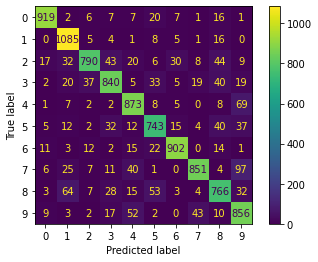

Acurácia: 0.8625


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clfL = LinearDiscriminantAnalysis()
clfL.fit(X_train, y_train)

y_test_pred = clfL.predict(X_test)

print(f'Score: {clfL.score(X_train, y_train)}')

print("Número de classificações incorretas em um total de %d: %d" % (X_test.shape[0], (y_test != y_test_pred).sum()))

labels = y.cat.categories

cm = confusion_matrix(y_test, y_test_pred, labels=labels)
print(cm)

disp = ConfusionMatrixDisplay(cm, display_labels = labels)
disp.plot()
plt.show()

print(f'Acurácia: {calcularAcuracia(cm)}')

Note que não há como atingir 100% de acurácia neste problema. Veja abaixo algumas instâncias especialmente complicadas, e possivelmente rotuladas erroneamente:

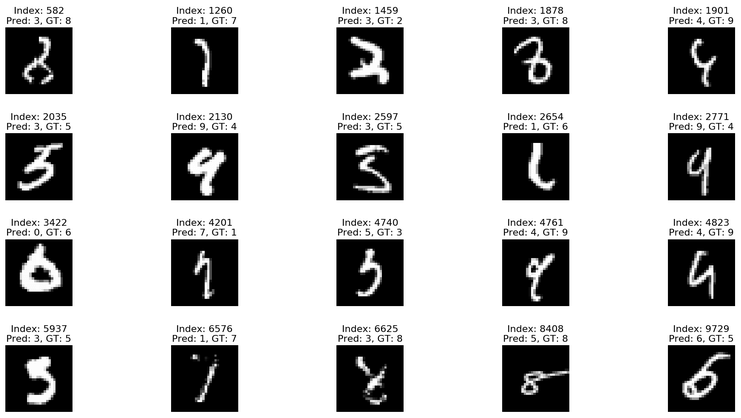